An Introduction to Statistical Learning (with python application) Chapter 7 Exercise: (9)

In [14]:
from ISLP import load_data
data = load_data("Boston")
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [15]:
from ISLP.models import ModelSpec, poly

Cubic Polynomial Regression Coefficients: [ 0.         -0.18208169  0.02192766 -0.000885  ]
Intercept: 0.9341280720211882


C:\Users\tejav\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


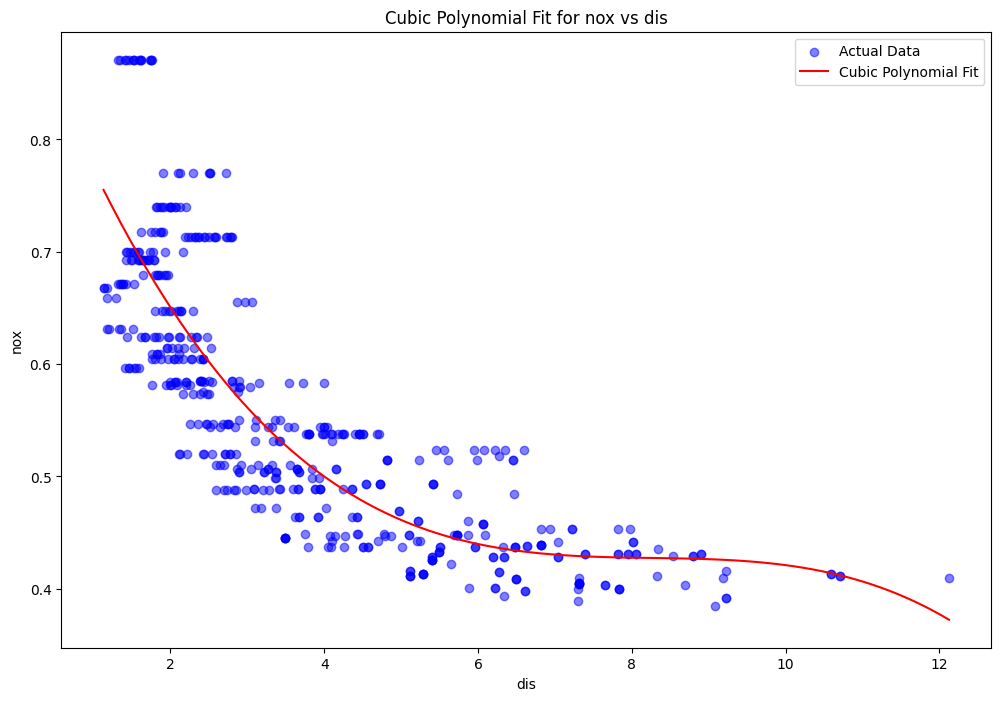

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from ISLP import load_data

# Load Boston dataset using ISLP load_data
data = load_data("Boston")

# (a) Fit a cubic polynomial regression
poly_degree = 3
poly = PolynomialFeatures(degree=poly_degree)
X_poly = poly.fit_transform(data[['dis']])
model = LinearRegression().fit(X_poly, data['nox'])

# Print regression output
print(f'Cubic Polynomial Regression Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

# Plot data and cubic polynomial fit
plt.figure(figsize=(12, 8))
plt.scatter(data['dis'], data['nox'], label='Actual Data', color='blue', alpha=0.5)

# Plot cubic polynomial fit
x_range = np.linspace(data['dis'].min(), data['dis'].max(), 100).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_pred = model.predict(x_range_poly)
plt.plot(x_range, y_pred, label=f'Cubic Polynomial Fit', color='red')

plt.xlabel('dis')
plt.ylabel('nox')
plt.legend()
plt.title('Cubic Polynomial Fit for nox vs dis')
plt.show()


C:\Users\tejav\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\tejav\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\tejav\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\tejav\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\tejav\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  

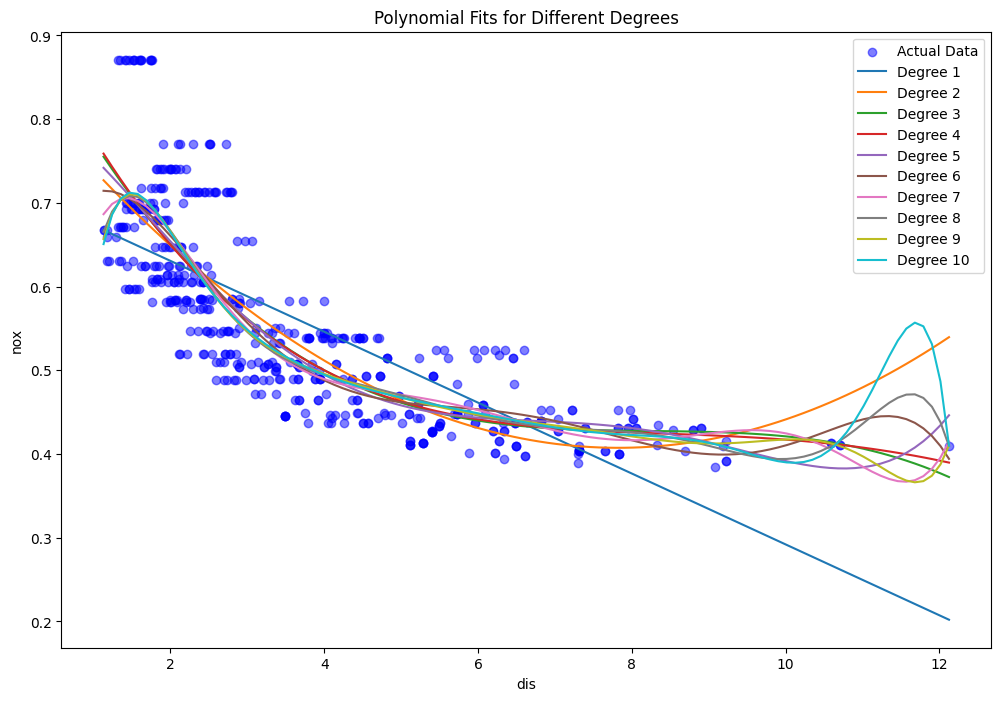

Degree 1: Residual Sum of Squares = 2.7685628589692755
Degree 2: Residual Sum of Squares = 2.0352618689352564
Degree 3: Residual Sum of Squares = 1.9341067071790707
Degree 4: Residual Sum of Squares = 1.9329813272985945
Degree 5: Residual Sum of Squares = 1.9152899610843042
Degree 6: Residual Sum of Squares = 1.8782572985081691
Degree 7: Residual Sum of Squares = 1.8494836145829507
Degree 8: Residual Sum of Squares = 1.8356296890678214
Degree 9: Residual Sum of Squares = 1.833330804509007
Degree 10: Residual Sum of Squares = 1.8321711385932724


In [17]:
# (b) Plot polynomial fits for different degrees
degrees = list(range(1, 11))
residual_sums = []

plt.figure(figsize=(12, 8))
plt.scatter(data['dis'], data['nox'], label='Actual Data', color='blue', alpha=0.5)

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(data[['dis']])
    model = LinearRegression().fit(X_poly, data['nox'])
    
    # Plot polynomial fit
    x_range = np.linspace(data['dis'].min(), data['dis'].max(), 100).reshape(-1, 1)
    x_range_poly = poly.transform(x_range)
    y_pred = model.predict(x_range_poly)
    
    plt.plot(x_range, y_pred, label=f'Degree {degree}')

    # Calculate and store residual sum of squares
    residuals = data['nox'] - model.predict(X_poly)
    residual_sum = np.sum(residuals**2)
    residual_sums.append(residual_sum)

plt.xlabel('dis')
plt.ylabel('nox')
plt.legend()
plt.title('Polynomial Fits for Different Degrees')
plt.show()

# Print associated residual sum of squares
for degree, residual_sum in zip(degrees, residual_sums):
    print(f'Degree {degree}: Residual Sum of Squares = {residual_sum}')

In [18]:
# (c) Perform cross-validation to select the optimal degree
cv_scores = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(data[['dis']])
    model = LinearRegression()
    cv_score = -np.mean(cross_val_score(model, X_poly, data['nox'], cv=5, scoring='neg_mean_squared_error'))
    cv_scores.append(cv_score)

optimal_degree = degrees[np.argmin(cv_scores)]
print(f'Optimal Degree selected by Cross-Validation: {optimal_degree}')
print( 'Based on the cross-validation results, the optimal polynomial degree appears to be 2. This is because the cross-validation error for degree 2 is the lowest. This suggests that a cubic polynomial model is the best fit for the data.')

Optimal Degree selected by Cross-Validation: 2
Based on the cross-validation results, the optimal polynomial degree appears to be 2. This is because the cross-validation error for degree 2 is the lowest. This suggests that a cubic polynomial model is the best fit for the data.


An Introduction to Statistical Learning (with python application) Chapter 8 Exercise: (3)

C:\Users\tejav\AppData\Local\Temp\ipykernel_2084\972934335.py:7: RuntimeWarning: divide by zero encountered in log
  cross_entropy = - (p * np.log(p) + (1 - p) * np.log(1 - p))
C:\Users\tejav\AppData\Local\Temp\ipykernel_2084\972934335.py:7: RuntimeWarning: invalid value encountered in multiply
  cross_entropy = - (p * np.log(p) + (1 - p) * np.log(1 - p))


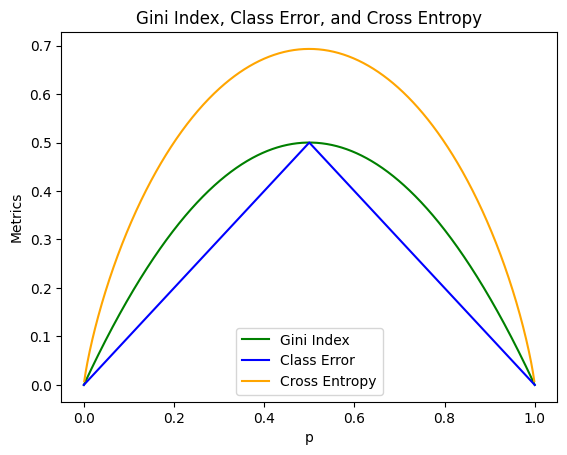

In [19]:
import numpy as np
import matplotlib.pyplot as plt

p = np.arange(0, 1.001, 0.001)
gini_index = 2 * p * (1 - p)
class_error = 1 - np.maximum(p, 1 - p)
cross_entropy = - (p * np.log(p) + (1 - p) * np.log(1 - p))

plt.plot(p, gini_index, label='Gini Index', color='green')
plt.plot(p, class_error, label='Class Error', color='blue')
plt.plot(p, cross_entropy, label='Cross Entropy', color='orange')

plt.xlabel('p')
plt.ylabel('Metrics')
plt.legend()
plt.title('Gini Index, Class Error, and Cross Entropy')
plt.show()


An Introduction to Statistical Learning (with python application) Chapter 8 Exercise: (5)

In the majority vote approach, we make a classification decision based on the most frequently occurring class among the 10 bootstrapped samples. In this case, there are 6 predictions for the class Red and 4 for the class Green. As the Red class has the majority, the final classification under the majority vote approach is Red.

On the other hand, the average probability approach considers the average of the 10 estimated probabilities for the Red class. The average probability is calculated as (0.1 + 0.15 + 0.2 + 0.2 + 0.55 + 0.6 + 0.6 + 0.65 + 0.7 + 0.75) / 10 = 0.45. Since this average probability is less than 0.5, the final classification under the average probability approach is Green. In summary, the majority vote emphasizes the most common prediction, while the average probability approach considers the overall confidence level across all predictions.

An Introduction to Statistical Learning (with python application) Chapter 8 Exercise: (8)

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
Carseats = load_data("Carseats")

# Convert categorical variables to dummy/indicator variables (one-hot encoding)
Carseats = pd.get_dummies(Carseats, columns=['ShelveLoc', 'Urban', 'US'], drop_first=True)

# (a) Split the data into a training set and a test set
X = Carseats.drop('Sales', axis=1)
y = Carseats['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

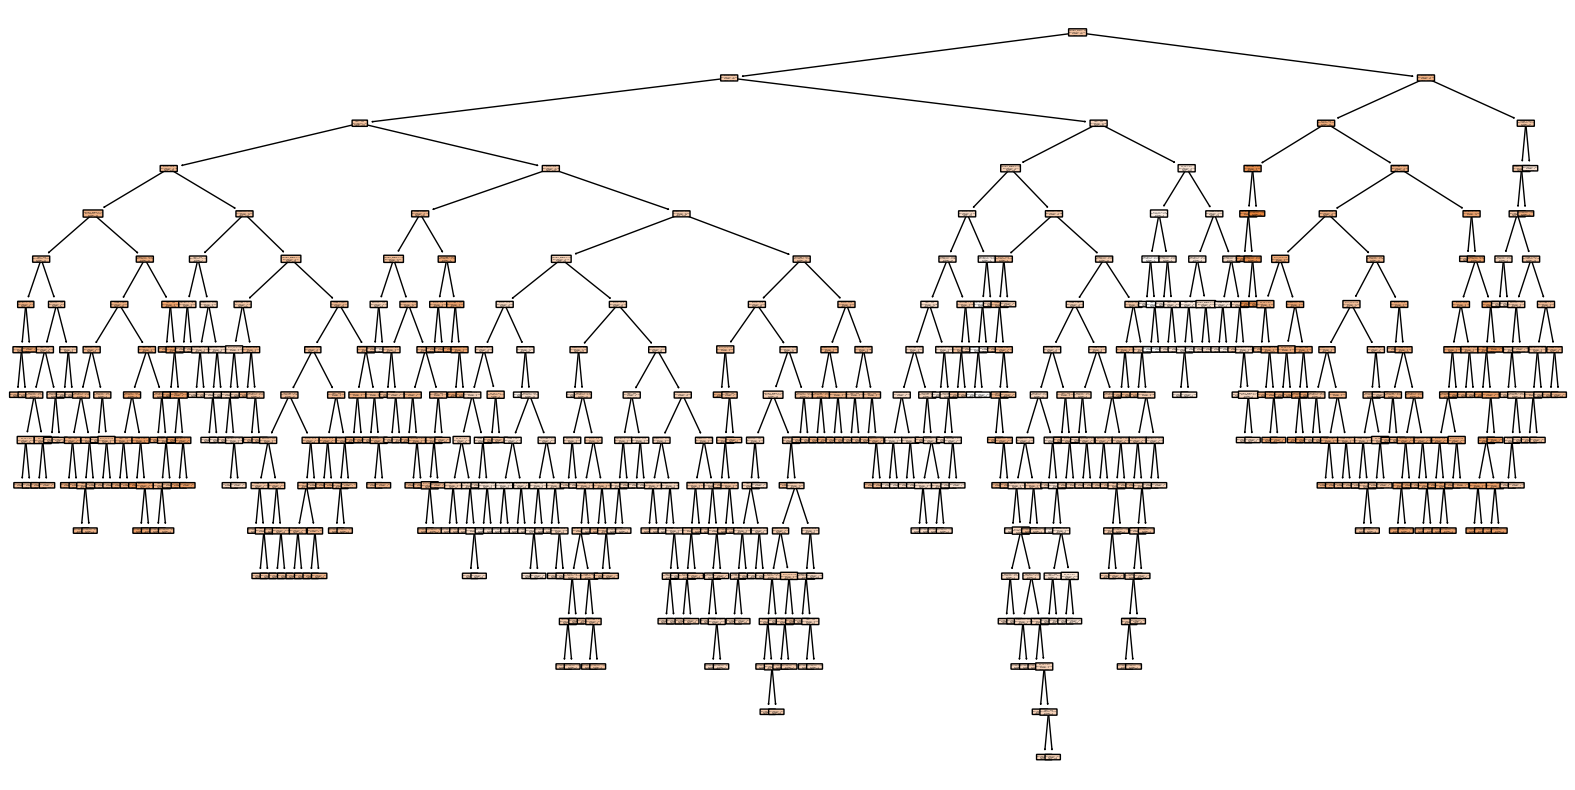

Test MSE for Regression Tree: 6.1788775000000005


In [22]:
# (b) Fit a regression tree to the training set
reg_tree = DecisionTreeRegressor(random_state=42)
reg_tree.fit(X_train, y_train)

# Plot the tree (visualize only if the tree is small)
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(reg_tree, feature_names=X.columns, filled=True, rounded=True)
plt.show()

# Calculate and print the test MSE
test_mse = np.mean((reg_tree.predict(X_test) - y_test) ** 2)
print(f'Test MSE for Regression Tree: {test_mse}')

In [23]:
# (c) Use cross-validation to determine the optimal level of tree complexity
cv_scores = []
for depth in range(1, 11):
    reg_tree_cv = DecisionTreeRegressor(max_depth=depth, random_state=42)
    cv_score = np.mean(cross_val_score(reg_tree_cv, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    cv_scores.append(cv_score)

optimal_depth = np.argmax(cv_scores) + 1  # Add 1 as depth starts from 1
print(f'Optimal Depth for Regression Tree: {optimal_depth}')

# Prune the tree with the optimal depth
reg_tree_pruned = DecisionTreeRegressor(max_depth=optimal_depth, random_state=42)
reg_tree_pruned.fit(X_train, y_train)

# Calculate and print the test MSE after pruning
test_mse_pruned = np.mean((reg_tree_pruned.predict(X_test) - y_test) ** 2)
print(f'Test MSE for Pruned Regression Tree: {test_mse_pruned}')

Optimal Depth for Regression Tree: 8
Test MSE for Pruned Regression Tree: 5.755769988288866


C:\Users\tejav\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


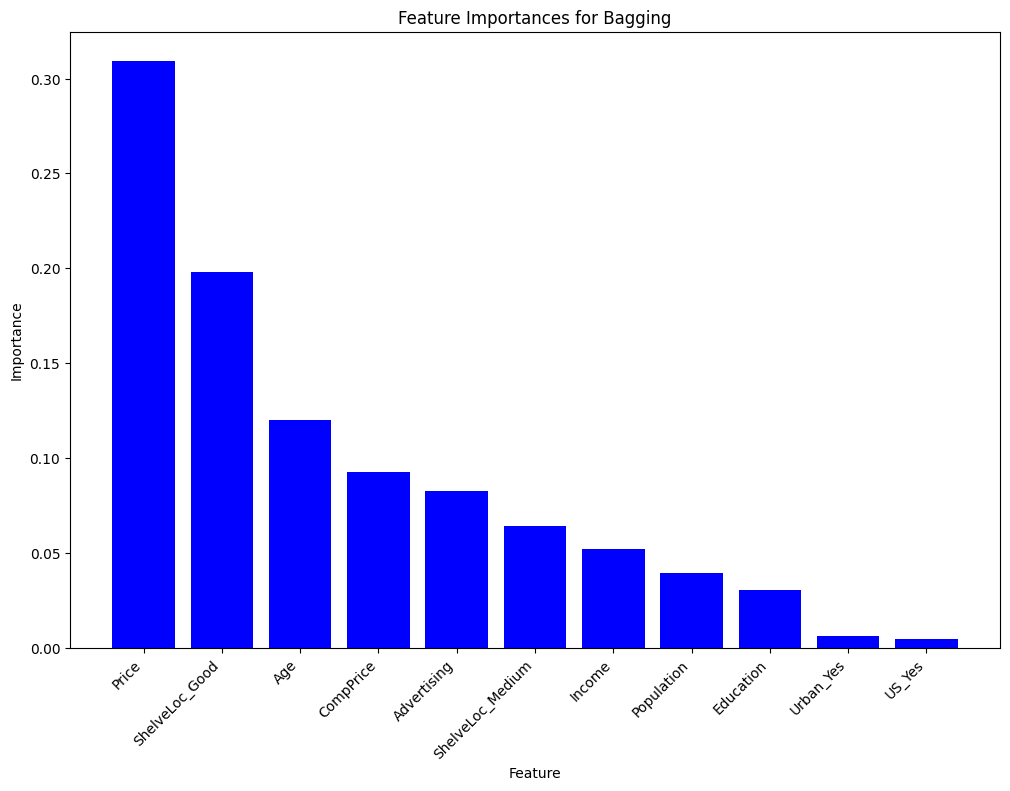

In [25]:
# (d) Use the bagging approach
bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)
bagging_reg.fit(X_train, y_train)

# Get feature importances for each base estimator (DecisionTreeRegressor)
feature_importances = np.mean([tree.feature_importances_ for tree in bagging_reg.estimators_], axis=0)

# Create a DataFrame for better visualization
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot a bar graph
plt.figure(figsize=(12, 8))
plt.bar(importances_df['Feature'], importances_df['Importance'], color='blue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances for Bagging')
plt.xticks(rotation=45, ha='right')
plt.show()

Feature Importances for Random Forests:
[0.09295752 0.05196757 0.08259079 0.03958484 0.3086413  0.12002061
 0.03081402 0.19839929 0.06464461 0.00587509 0.00450435]


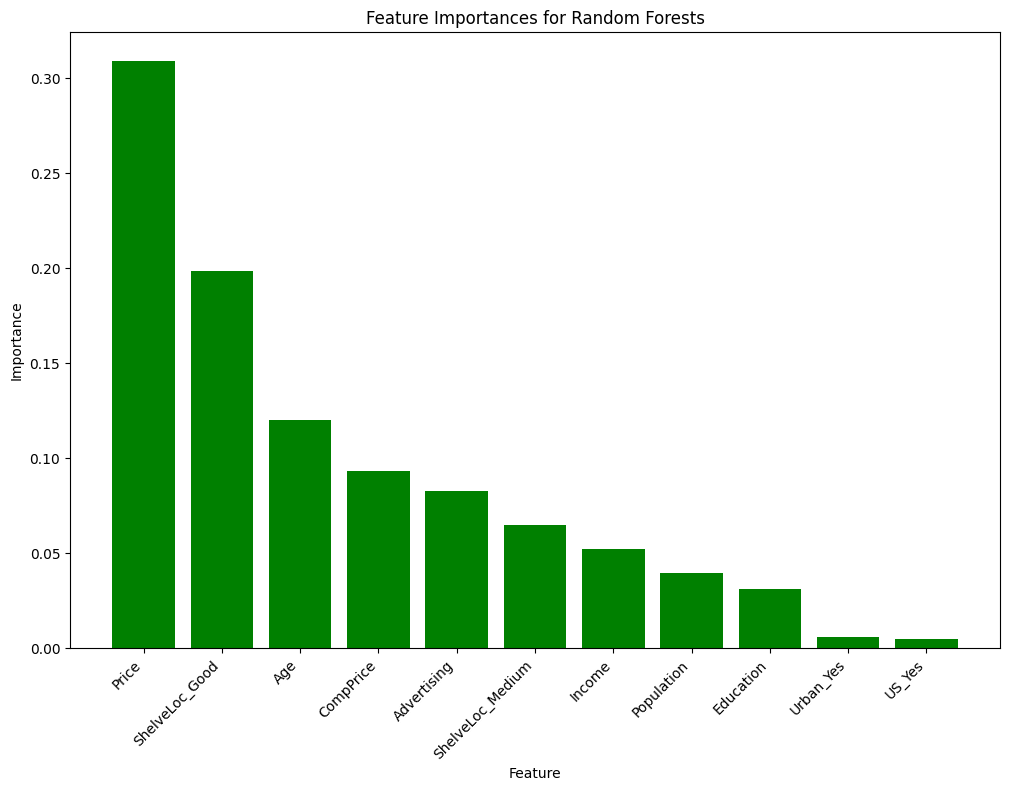

In [26]:
# (e) Use random forests
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg.fit(X_train, y_train)

# Print feature importances for random forests
feature_importances_rf = random_forest_reg.feature_importances_
print('Feature Importances for Random Forests:')
print(feature_importances_rf)

# Create a DataFrame for better visualization
importances_rf_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_rf})
importances_rf_df = importances_rf_df.sort_values(by='Importance', ascending=False)

# Plot a bar graph
plt.figure(figsize=(12, 8))
plt.bar(importances_rf_df['Feature'], importances_rf_df['Importance'], color='green')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances for Random Forests')
plt.xticks(rotation=45, ha='right')
plt.show()

In [41]:
# Assuming you have a proper BART implementation available
from sklearn.model_selection import train_test_split
from ISLP.bart import BART
from ISLP import load_data

# Load Carseats dataset
Carseats_bart = load_data('Carseats')

# Convert categorical variables to dummy/indicator variables (one-hot encoding)
Carseats_bart = pd.get_dummies(Carseats_bart, columns=['ShelveLoc', 'Urban', 'US'], drop_first=True)

# (a) Split the data into a training set and a test set
X = Carseats_bart.drop('Sales', axis=1)
y = Carseats_bart['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit BART model
bart_model = BART()
bart_model.fit(X_train.values, y_train.values)

# Predict on the test set
y_pred_bart = bart_model.predict(X_test.values)

# Calculate and print the test MSE for BART
test_mse_bart = np.mean((y_pred_bart - y_test.values) ** 2)
print(f'Test MSE for BART: {test_mse_bart}')

ValueError: high is out of bounds for int32